In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)

In [55]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'],df['label'], test_size = 0.2, random_state=42)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [57]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [26]:
import joblib

joblib.dump(clf,'sentiment_analysis.pickle')

['sentiment_analysis.pickle']

In [58]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.80      0.63      0.71       768
           0       0.72      0.94      0.81      1957
           1       0.83      0.18      0.29       557

    accuracy                           0.74      3282
   macro avg       0.78      0.58      0.60      3282
weighted avg       0.76      0.74      0.70      3282



In [65]:
text= ['emang kelakukan anak anak tolol ini bikin malu aja']
text_tfidf = tfidf_vectorizer.transform(text)
sentiment = clf.predict(text_tfidf)

print(sentiment)

['-1']


kode dibawah melakukan training model untuk nantinya diekstrak

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf',MultinomialNB())
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('clf', MultinomialNB())])

In [25]:
import joblib

joblib.dump(pipeline, 'model.pkl')

['model.pkl']

kode dibawah adalah percobaan underfitting dan overfitting

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
import joblib

df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)

X=df['Tweet']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
joblib.dump(vectorizer, 'vectorizer.pkl')
X_test_vec = vectorizer.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_vec, y_train)

nb = MultinomialNB(alpha=1)
nb.fit(X_train_res, y_train_res)


MultinomialNB(alpha=1)

In [2]:
import joblib

joblib.dump(nb,'sentiment_analysisV2.pkl')

['sentiment_analysisV2.pkl']

In [75]:
from sklearn.metrics import classification_report

y_pred = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.64      0.89      0.74       768
         0.0       0.92      0.58      0.71      1957
         1.0       0.47      0.82      0.60       557

    accuracy                           0.70      3282
   macro avg       0.68      0.77      0.69      3282
weighted avg       0.78      0.70      0.70      3282



In [76]:
text = ['moderasi agama adalah program liberal pembodohan pemuda']
text_tfidf = vectorizer.transform(text)
sentiment = nb.predict(text_tfidf)
print(sentiment)

[-1.]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load dataset
df = pd.read_csv('full_dataset.csv')

# split dataset menjadi train dan test set
train, test = train_test_split(df, test_size=0.2, random_state=42)

# hitung jumlah sampel pada label 1
count_class_1, count_class_0, count_class_minus1 = train.label.value_counts()

# ambil sampel acak dari label 0 dengan jumlah yang sama dengan label 1
df_class_0 = train[train['label'] == 0].sample(count_class_1, random_state=42)

# gabungkan sampel label 0 dan label 1
df_train = pd.concat([df_class_0, train[train['label'] == 1]])

# latih model naive bayes pada dataset yang telah dikurangi
# (df_train['tweet'] adalah fitur dan df_train['label'] adalah target)
# setelah itu lakukan evaluasi model Anda


ValueError: too many values to unpack (expected 3)

This is the updated code

In [3]:
import pandas as pd
import numpy as np

#load dataset
df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)
df

,Date,Username,Tweet,label
0,2023-02-15 23:45:11+00:00,NasionalPakin,dpn pakin terima buku moderasi agama karya luk...,1.0
1,2023-02-15 23:42:01+00:00,NasionalPakin,dpn pakin terima buku moderasi agama karya luk...,1.0
2,2023-02-15 23:24:40+00:00,Kemenag_Maluku,haji kemenagri gusmen kemenagmaluku moderasibe...,0.0
3,2023-02-15 22:38:39+00:00,umi_acuh,kondisi parah sistem didik sekuler arus modera...,-1.0
4,2023-02-15 15:42:59+00:00,bimaskristenri,salam sahabatreligi launching seleksi nasional...,0.0
...,...,...,...,...
16403,2023-03-06 07:31:06+00:00,3669x,buzzer pertamina kali mreka nih tetangga nih t...,-1.0
16404,2023-03-06 07:30:59+00:00,IdSinpo,bakar depo plumpang pks panggil erick thohir b...,0.0
16405,2023-03-06 07:30:47+00:00,M29___,kalo gada imb gusur era gub nya relokasi gamau...,-1.0
16406,2023-03-06 07:30:43+00:00,snickeus,emang sesuai tata kelola sih ya,0.0


In [4]:
summary_stats = df.describe()
print("Summary Statistics: ")
print(summary_stats)

Summary Statistics: 
              label
count  16407.000000
mean      -0.075212
std        0.633649
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


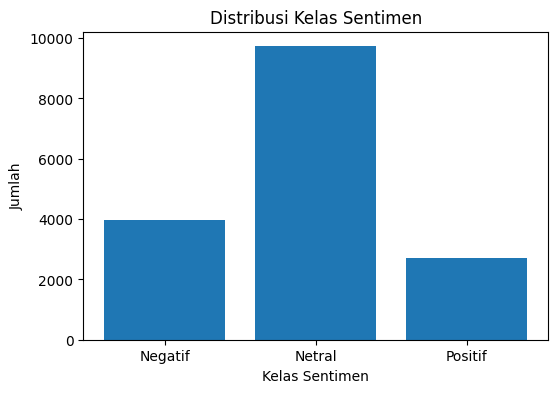

In [5]:
import matplotlib.pyplot as plt

class_labels = ['Negatif','Netral','Positif']
class_counts = np.unique(df['label'], return_counts=True)[1]
plt.figure(figsize=(6,4))
plt.bar(class_labels,class_counts)
plt.xlabel('Kelas Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Sentimen')
plt.show()

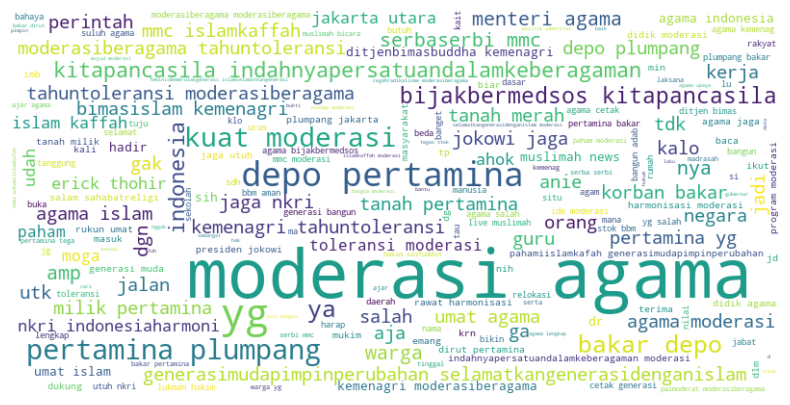

In [6]:
from wordcloud import WordCloud

all_tweet_text = ' '.join(df['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweet_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

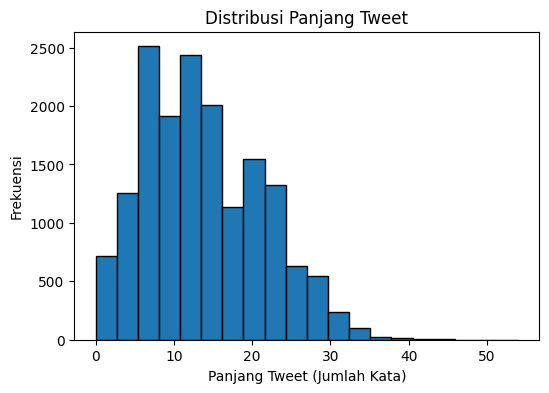

In [7]:
import matplotlib.pyplot as plt

df['Tweet_Length'] = df['Tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
plt.hist(df['Tweet_Length'],bins=20, edgecolor='black')
plt.xlabel('Panjang Tweet (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Tweet')
plt.show()

In [5]:
label_counts = df['label'].value_counts()
print(label_counts)

 0.0    9727
-1.0    3957
 1.0    2723
Name: label, dtype: int64


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#load dataset
df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)

#feature and label
X = df['Tweet']
y = df['label']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#vectorize the data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#using SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)


#train the model
nb = MultinomialNB(alpha=1)
nb.fit(X_train_vec, y_train)

#prediction
y_pred = nb.predict(X_test_vec)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)


Accuracy:  0.7404021937842779


In [13]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.80      0.65      0.72       392
         0.0       0.72      0.94      0.81       957
         1.0       0.89      0.22      0.35       292

    accuracy                           0.74      1641
   macro avg       0.80      0.60      0.63      1641
weighted avg       0.77      0.74      0.71      1641



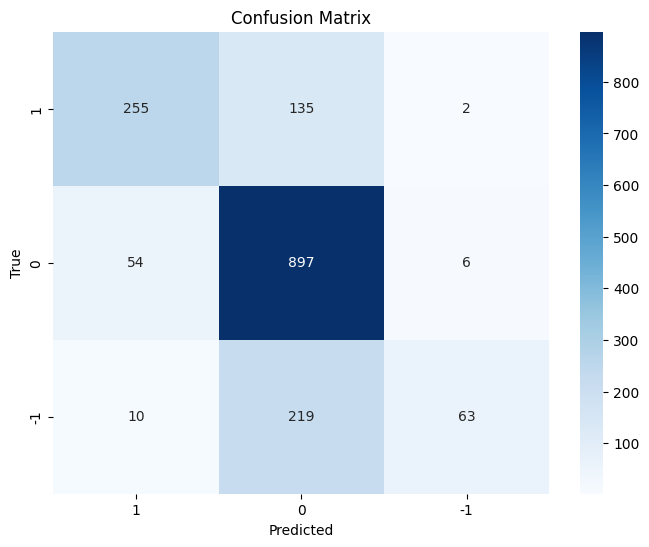

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,0,-1], yticklabels=[1,0,-1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import joblib

joblib.dump(vectorizer, 'vectorizer_no_SMOTE.pkl')
joblib.dump(nb,'sentiment_analysisV2_no_SMOTE.pkl')

['sentiment_analysisV2_no_SMOTE.pkl']

In [25]:
# Calculate the class distribution before SMOTE
unique, counts = np.unique(y_train, return_counts=True)
class_distribution_before = dict(zip(unique, counts))

# Calculate the class distribution after SMOTE
unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
class_distribution_after = dict(zip(unique_resampled, counts_resampled))

# Print the class distribution before and after SMOTE
print("Distribusi Kelas sebelum SMOTE:")
for label, count in class_distribution_before.items():
    print(f"Kelas {label}: {count} sampel")

print("\nDistribusi Kelas Setelah SMOTE:")
for label, count in class_distribution_after.items():
    print(f"Kelas {label}: {count} sampel")

Distribusi Kelas sebelum SMOTE:
Kelas -1.0: 3565 sampel
Kelas 0.0: 8770 sampel
Kelas 1.0: 2431 sampel

Distribusi Kelas Setelah SMOTE:
Kelas -1.0: 8770 sampel
Kelas 0.0: 8770 sampel
Kelas 1.0: 8770 sampel


In [19]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.65      0.91      0.76       396
         0.0       0.90      0.71      0.79       973
         1.0       0.61      0.71      0.66       272

    accuracy                           0.76      1641
   macro avg       0.72      0.78      0.74      1641
weighted avg       0.79      0.76      0.76      1641



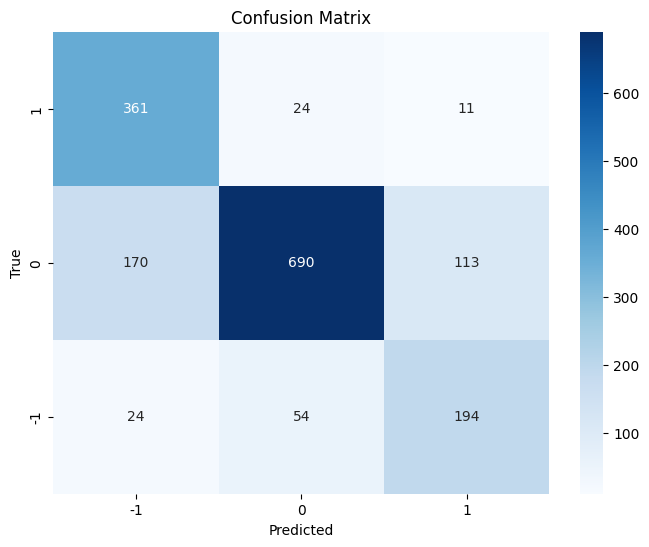

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[-1,0,1], yticklabels=[1,0,-1])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE

#load dataset
df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)

#feature and label
X = df['Tweet']
y = df['label']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#vectorize the data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

#train the model
nb = MultinomialNB(alpha=1)
nb.fit(X_train_resampled, y_train_resampled)

#prediction
y_pred = nb.predict(X_test_vec)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7382693479585618


In [22]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.62      0.91      0.74       791
         0.0       0.89      0.68      0.77      1946
         1.0       0.59      0.71      0.65       545

    accuracy                           0.74      3282
   macro avg       0.70      0.77      0.72      3282
weighted avg       0.78      0.74      0.74      3282



In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE

#load dataset
df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)

#feature and label
X = df['Tweet']
y = df['label']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#vectorize the data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

#train the model
nb = MultinomialNB(alpha=1)
nb.fit(X_train_resampled, y_train_resampled)

#prediction
y_pred = nb.predict(X_test_vec)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.742320819112628


In [25]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.62      0.91      0.74       989
         0.0       0.90      0.68      0.77      2432
         1.0       0.60      0.72      0.66       681

    accuracy                           0.74      4102
   macro avg       0.71      0.77      0.72      4102
weighted avg       0.78      0.74      0.75      4102



In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE

#load dataset
df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)

#feature and label
X = df['Tweet']
y = df['label']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#vectorize the data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

#train the model
nb = MultinomialNB(alpha=1)
nb.fit(X_train_resampled, y_train_resampled)

#prediction
y_pred = nb.predict(X_test_vec)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.738167783871623


In [27]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.61      0.91      0.73      1187
         0.0       0.89      0.68      0.77      2919
         1.0       0.61      0.71      0.65       817

    accuracy                           0.74      4923
   macro avg       0.70      0.76      0.72      4923
weighted avg       0.78      0.74      0.74      4923



In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE

#load dataset
df = pd.read_csv('full_dataset.csv')
df['Tweet'] = df['Tweet'].replace(np.nan,'')
df.dropna(inplace=True)

#feature and label
X = df['Tweet']
y = df['label']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

#vectorize the data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

#train the model
nb = MultinomialNB(alpha=1)
nb.fit(X_train_resampled, y_train_resampled)

#prediction
y_pred = nb.predict(X_test_vec)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.742952917872924


In [29]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.63      0.90      0.74      1583
         0.0       0.88      0.70      0.78      3891
         1.0       0.60      0.68      0.63      1089

    accuracy                           0.74      6563
   macro avg       0.70      0.76      0.72      6563
weighted avg       0.77      0.74      0.75      6563

